In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_absolute_error
%matplotlib inline
plt.style.use("ggplot")


train = pd.read_csv("E:/Kaggle/AllState/train.csv")
test = pd.read_csv("E:/Kaggle/AllState/test.csv")
y = train.loss


train.head(5)

C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
x_train = train.drop(["id", "loss"], axis = 1)
x_test = test.drop(["id"], axis = 1)
x_train.head()
x_train.shape

(188318, 130)

In [4]:
#always keep on deleting the objects which we wont be using as this helps us save memory. This is very important when you deal
# with large datasets and have low RAM problems

del train
del test

In [5]:
x_train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000040744F9390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000004074497400>]], dtype=object)

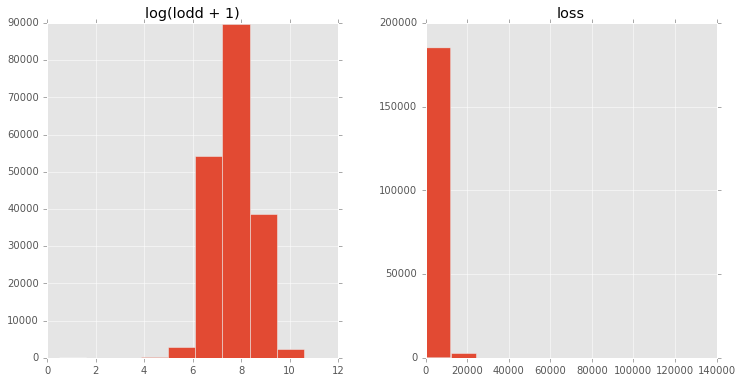

In [6]:
#checking for the distribution of the target variable
plt.rcParams["figure.figsize"] = (12, 6)
loss = pd.DataFrame({"loss": y, "log(lodd + 1)" : np.log1p(y)})
loss.hist()

In [7]:
x_train.skew()

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
dtype: float64

As the skewness or the distributions are not that bad we dont normalize the other numerical variables.

# Finding the Corelations in the variables using Pearson corealtion

In [8]:
threshold = 0.5 #setting a threshold

split = 116 #used for splitting the data

size = 14 #size of the numerical values in the dataset

cols= x_train.columns #getting the names of all the columns in the datset 

num_values = x_train.iloc[:, split:] #taking in the numerical values from the dataset

corr_list = []

#finding corelation for the numerical values
num_values_corr = num_values.corr()

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (num_values_corr.iloc[i,j] >= threshold and num_values_corr.iloc[i,j] < 1) or (num_values_corr.iloc[i,j] < 0 and num_values_corr.iloc[i,j] <= -threshold):
            corr_list.append([num_values_corr.iloc[i,j],i,j])
            
#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

cat11 and cat12 = 0.99
cat1 and cat9 = 0.93
cat6 and cat10 = 0.88
cat6 and cat13 = 0.82
cat1 and cat10 = 0.81
cat6 and cat9 = 0.80
cat9 and cat10 = 0.79
cat6 and cat12 = 0.79
cat6 and cat11 = 0.77
cat1 and cat6 = 0.76
cat7 and cat11 = 0.75
cat7 and cat12 = 0.74
cat10 and cat12 = 0.71
cat10 and cat13 = 0.71
cat10 and cat11 = 0.70
cat6 and cat7 = 0.66
cat9 and cat13 = 0.64
cat9 and cat12 = 0.63
cat1 and cat12 = 0.61
cat9 and cat11 = 0.61
cat1 and cat11 = 0.60
cat1 and cat13 = 0.53
cat4 and cat8 = 0.53


As we see that the corelation of cont11 and cont12 is very high, we can remove any one of them as well as remove anyone from cont1 and cont 9. They would nearly plot in a linear manner.

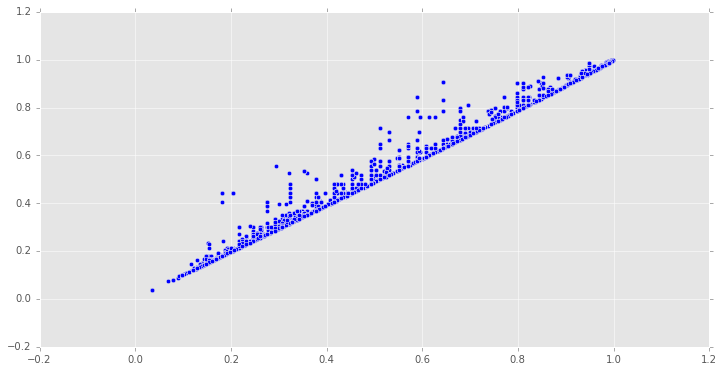

In [9]:
#lest plot both these scenarios

plt.scatter(x= x_train["cont11"], y = x_train["cont12"])

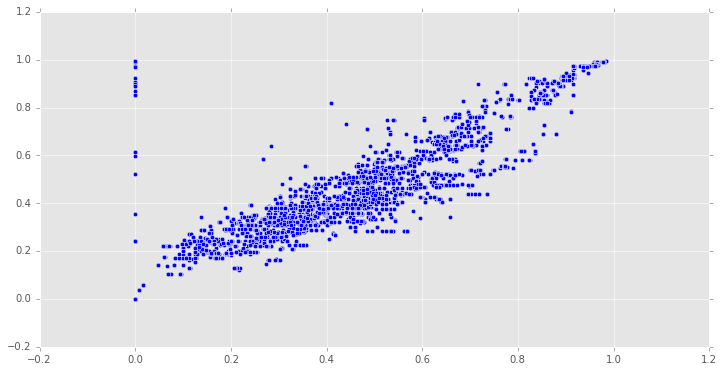

In [10]:
plt.scatter(x= x_train["cont1"], y = x_train["cont9"])

In [11]:
#So we remove cont9 and cont12 from training as well as testing datset

x_train = x_train.drop(["cont9", "cont12"], axis = 1)
x_test = x_test.drop(["cont9", "cont12"], axis = 1)

In [12]:
x_train.shape

(188318, 128)

# Categorical Variables

In [13]:
#to get the statistics of the categorical variable
x_train.describe(include = ['object'])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


In [14]:
x_test.describe(include = ["object"])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546,125546
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,6,8,8,5,7,5,9,7,5,17,15,17,7,14,17,18,18,20,11,74,123,16,51,60,18,23,311
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,94096,71203,118752,86026,82282,88014,122546,118112,75509,106944,112470,106777,112604,123954,125523,121262,124666,124902,124376,125434,125291,125519,105272,121430,113405,118077,112239,120751,123093,123247,122061,124723,124914,125184,125417,104035,110512,112774,122170,120081,120840,124343,122811,114985,122647,124972,125055,125366,119495,91888,124761,119761,115388,122577,125449,125435,123560,125393,125340,125289,125024,125525,125501,125524,124021,119930,125112,125437,125351,125526,119187,79486,102595,123055,102828,120866,124976,124325,102007,91839,102914,98004,94109,103199,123963,68647,111306,112427,122546,118752,73787,83053,100031,80907,58836,116162,51813,69800,52645,28847,71203,118112,82282,28632,50984,31015,31553,43219,102134,16792,86026,16961,17565,88014,29161,14015


We need to use OneHotEncoding to for all the categorical variables so as to preserve the uniqueness of the data in them. As my laptop is a bit slow, I splitted the entire training and the testing datset into small chunks so that i dont have the "Memory error". If you want to run it in one go remove all the chunks and just replace "50 to split" in the "one hot encode all categorical" snippet.

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


#Variable to hold the list of variables for an attribute in the train and test data
labels = []
split = 116

for i in range(0, split):
    train = x_train[cols[i]].unique()
    test = x_test[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

#One hot encode all categorical attributes
cats = []
for i in range(0, 50):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats1 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats1.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature






(188318, 100)


In [16]:

#One hot encode all categorical attributes
cats = []
for i in range(50, 85):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats2 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats2.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(188318, 92)


In [17]:
#One hot encode all categorical attributes
cats = []
for i in range(85, 96):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats3 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats3.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(188318, 71)


In [18]:
#One hot encode all categorical attributes
cats = []
for i in range(96, 105):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats4 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats4.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(188318, 123)


In [19]:
#One hot encode all categorical attributes
cats = []
for i in range(105, 112):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats5 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats5.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(188318, 336)


In [20]:
#One hot encode all categorical attributes
cats = []
for i in range(112, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_train.iloc[:,i])
    feature = feature.reshape(x_train.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats6 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats6.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(188318, 454)


In [21]:
decoded_data = np.concatenate((encoded_cats1,encoded_cats2, encoded_cats3, encoded_cats4, encoded_cats5, encoded_cats6, x_train.iloc[:,split:]), axis = 1)

In [22]:
del encoded_cats1
del encoded_cats2
del encoded_cats3
del encoded_cats4
del encoded_cats5
del encoded_cats6

In [23]:
decoded_data.shape

(188318, 1188)

In [24]:
x_test.shape

(125546, 128)

For Categorical Values in the testing Dataset

In [25]:
#One hot encode all categorical attributes
cats = []
for i in range(0, 50):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats1 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats1.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(125546, 100)


In [26]:
#One hot encode all categorical attributes
cats = []
for i in range(50, 85):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats2 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats2.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature



(125546, 92)


In [27]:
decoded_data1 = np.concatenate((encoded_cats1, encoded_cats2), axis = 1)

In [28]:
del encoded_cats1
del encoded_cats2
 

In [29]:
#One hot encode all categorical attributes
cats = []
for i in range(85, 95):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats3 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats3.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(125546, 62)


In [30]:
#One hot encode all categorical attributes
cats = []
for i in range(95, 105):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats1 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats1.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(125546, 132)


In [31]:
decoded_data2 = np.concatenate((decoded_data1, encoded_cats3, encoded_cats1), axis = 1)

In [32]:
del decoded_data1
del encoded_cats3
del encoded_cats1

In [33]:
#One hot encode all categorical attributes
cats = []
for i in range(105, 112):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats1 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats1.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(125546, 336)


In [34]:
decoded_data3 = np.concatenate((decoded_data2, encoded_cats1), axis = 1)

In [35]:
del decoded_data2
del encoded_cats1

In [36]:
#One hot encode all categorical attributes
cats = []
for i in range(112, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(x_test.iloc[:,i])
    feature = feature.reshape(x_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

    
# Make a 2D array from a list of 1D arrays
encoded_cats1 = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats1.shape)

#Concatenate encoded attributes with continuous attributes
#dataset_encoded = np.concatenate((encoded_cats,x_train.iloc[:,split:].values),axis=1)
del cats
del feature


(125546, 454)


In [37]:
decoded_data_test = np.concatenate((decoded_data3, encoded_cats1, x_test.iloc[:, split:]), axis = 1)

In [38]:
del decoded_data3
del encoded_cats1

# Training the Xgboost model

In [39]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(decoded_data, y, test_size = 0.4, random_state = 4) 

We would be using the randomized search method which will help us get the best features from the a range which we specify. You can also use Gridsearch but I prefer to use Randomizedsearch over Gridsearch. 

In [40]:
from xgboost.sklearn import XGBRegressor
import scipy.stats as st

one_to_left = st.beta(10, 1)
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthread =-1) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(X_train, Y_train)  
gs.best_model_ 

This will give you a best hyperparameters for the xgboost model for this problem. But this will surely take a lot of time. So if you want to get satisfying results here are some of the simple hyperparameters you can directly try with and get a good Leaderboard score.

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.8,
    'learning_rate': 0.090,
    'objective': 'reg:linear',
    'max_depth': 6,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'mae',
}

Use the "Mean absolute Error" metric as it is the error metric for this competition. You can write a fuction which directly measures the "MAE" for every model that you try so that you can find some othe rgood algorithms as well.

Try Stacking of Xgboost and ExtraTreeRegressor, and then average their score or go for another layer, this will surely further improve the Leaderbord score. For stacking reference you can see this post from Kaggle : https://www.kaggle.com/jimthompson/house-prices-advanced-regression-techniques/ensemble-model-stacked-model-example/code